# Sprint 2

Team ID - PNT2022TMID29441

**Importing the required libraries**

In [10]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

**Load data**

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Data Analysis**

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [13]:
X_train[22]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
y_train[22]

9

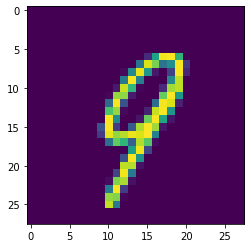

In [16]:
plt.imshow(X_train[22])

**Data Pre-Processing**

In [18]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [19]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [20]:
Y_train[22]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

**Create model**

In [21]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [22]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

**Train the model**

In [25]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.1097 - val_accuracy: 0.9795
Epoch 2/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0.1244 - val_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.1543 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 194s 104ms/step - loss: 0.0225 - accuracy: 0.9947 - val_loss: 0.1403 - val_accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0163 - accuracy: 0.9959 - val_loss: 0.1508 - val_accuracy: 0.9803


**Test the model**

In [26]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.15078257024288177, 0.9803000092506409]


In [27]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 144ms/step
[[2.1790761e-21 7.4982545e-32 2.5597884e-18 1.3963956e-12 3.5476004e-34
  2.3685766e-23 7.2435500e-35 1.0000000e+00 1.5694772e-19 9.3746343e-13]
 [1.0572368e-18 5.2437657e-22 1.0000000e+00 1.8552249e-26 1.7213811e-34
  0.0000000e+00 3.1170558e-18 0.0000000e+00 3.9931637e-20 5.3023201e-37]
 [1.4259540e-19 1.0000000e+00 1.3926764e-13 7.8348564e-22 1.5881537e-11
  1.6358945e-18 2.3144040e-17 1.3155135e-15 1.3779860e-12 2.3233615e-20]
 [1.0000000e+00 5.8034413e-27 3.8073158e-17 1.3050163e-24 2.4684719e-29
  9.8074457e-23 4.8877768e-17 1.5732977e-24 2.3064356e-18 3.3164215e-16]]


In [28]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
